In [2]:
import random

In [3]:
import warnings
warnings.filterwarnings("ignore")


In [4]:
def average_py(n):
    s = 0 # initializes the variable value for s
    for i in range(n):
        s += random.random() # adds the uniformly distributed random values from the interval (0,1) to s
    return s / n # returns the average value (mean)

In [5]:
n = 10000000 # defines the number of iterations for the loop

In [6]:
%time average_py(n) # times the function once

CPU times: user 469 ms, sys: 1.1 ms, total: 470 ms
Wall time: 471 ms


0.5000181763412244

In [7]:
%timeit average_py(n) # times the function multiple times for a more reliable estimate

484 ms ± 23.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%time sum([random.random() for _ in range(n)]) / n # uses a list comprehension instead of the function

CPU times: user 449 ms, sys: 42.2 ms, total: 491 ms
Wall time: 492 ms


0.5000451153950494

In [9]:
import numpy as np

In [10]:
def average_np(n):
    s = np.random.random(n) # draws the random numbers "all at once" (no python loop)
    return s.mean() # returns the average value (mean)

In [11]:
%time average_np(n)

CPU times: user 415 ms, sys: 114 ms, total: 530 ms
Wall time: 60.6 ms


0.4998948935594273

In [12]:
%timeit average_np(n)

30.5 ms ± 235 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
s = np.random.random(n)
s.nbytes # numbers of bytes used for the created ndarray object

80000000

In [14]:
import numba

In [15]:
average_nb = numba.jit(average_py) # creates the numba function

In [16]:
%time average_nb(n) # the compiling happens during runtime, leading to some overhead

CPU times: user 890 ms, sys: 1.92 s, total: 2.81 s
Wall time: 319 ms


0.4997117883529121

In [17]:
%time average_nb(n) # from the second execution (with the same input data types), the execution is faster

CPU times: user 27.4 ms, sys: 96.6 ms, total: 124 ms
Wall time: 21.6 ms


0.5000959625521202

In [18]:
%time average_nb(n)

CPU times: user 15.5 ms, sys: 57 µs, total: 15.6 ms
Wall time: 15.6 ms


0.49994068956255167

**Cython**

In [19]:
%load_ext Cython

In [20]:
%%cython -a
import random # imports the random module within the Cython context
def average_cy1(int n): # adds static type declarations for the variables n, i, and s
    cdef int i
    cdef float s = 0
    for i in range(n):
        s += random.random()
    return s / n

In [21]:
%time average_cy1(n)

CPU times: user 321 ms, sys: 506 µs, total: 321 ms
Wall time: 321 ms


0.5000582933425903

In [22]:
%%cython
from libc.stdlib cimport rand # import a random number generator from C
cdef extern from 'limits.h': # import a constant value for the scaling of the random numbers
    int INT_MAX # adds uniformly distributed random numbers from the interval(0, 1), after scaling

def generate_random():
    cdef int i
    cdef float rn
    for i in range(5):
        rn = rand() / INT_MAX  # Ensure float division
        print(rn)

In [23]:
%%cython -a
from libc.stdlib cimport rand
cdef extern from 'limits.h':
    int INT_MAX

def average_cy2(int n):
    cdef int i
    cdef float s = 0
    for i in range(n):
        s += rand() / INT_MAX
    return s / n

In [24]:
%time average_cy2(n)

CPU times: user 58.3 ms, sys: 105 µs, total: 58.4 ms
Wall time: 58.5 ms


0.5000175833702087

In [25]:
%time average_cy2(n)

CPU times: user 42.8 ms, sys: 93 µs, total: 42.9 ms
Wall time: 43 ms


0.4998512864112854

**Algorithms**

In [26]:
def is_Prime(I):
    if I % 2 == 0:
        return False
    for i in range(3, int(I ** 0.5) + 1, 2):
        if I % i == 0: return False
    return True

In [27]:
n = int(1e8 + 3)
n

100000003

In [28]:
%time is_Prime(n)

CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 11.9 µs


False

In [29]:
p1 = int(1e8 + 7)
p1

100000007

In [30]:
%time is_Prime(p1)

CPU times: user 234 µs, sys: 17 µs, total: 251 µs
Wall time: 332 µs


True

In [31]:
p2 = 100109100129162907

In [32]:
p2.bit_length()

57

In [33]:
%time is_Prime(p2)

CPU times: user 5.84 s, sys: 4.72 ms, total: 5.84 s
Wall time: 5.86 s


True

In [34]:
is_prime_nb = numba.jit(is_Prime)

In [35]:
%time is_prime_nb(n) # the first call of is_Prime_nb() involves the compiling overhead

CPU times: user 65.6 ms, sys: 2.16 ms, total: 67.7 ms
Wall time: 68.2 ms


False

In [36]:
%time is_prime_nb(n) # from the second call, the speeduo becomes fully visible

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


False

In [37]:
%time is_prime_nb(p1)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 6.91 µs


True

In [38]:
%time is_prime_nb(p2) # the speedup for the larger prime is about an order of magnitude

CPU times: user 93.7 ms, sys: 1.64 ms, total: 95.3 ms
Wall time: 98.5 ms


True

In [39]:
%%cython
def is_Prime_cy1(I):
    if I % 2 == 0: return False
    for i in range(3, int(I ** 0.5) + 1, 2):
        if I % i == 0: return False
    return True

In [40]:
%timeit is_Prime(p1)

132 µs ± 3.86 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [41]:
%timeit is_Prime_cy1(p1)

84.2 µs ± 1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [42]:
%%cython
def is_Prime_cy2(long I):
    cdef long i
    if I < 2:
        return False
    if I == 2:
        return True
    if I % 2 == 0:
        return False
    for i in range(3, int(I ** 0.5) + 1, 2):
        if I % i == 0:
            return False
    return True


In [43]:
%timeit is_Prime_cy2(p1)

3.72 µs ± 49.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [44]:
%time is_prime_nb(p2)

CPU times: user 80.6 ms, sys: 174 µs, total: 80.8 ms
Wall time: 81 ms


True

In [45]:
%time is_Prime_cy2(p2)

CPU times: user 118 ms, sys: 254 µs, total: 118 ms
Wall time: 119 ms


True

**Multiprocessing**

In [46]:
import multiprocessing as mp

In [47]:
pool = mp.Pool(processes=4) # the mp.Pool object is instantiated with multiple processes

**Fibonacci Numbers**

In [48]:
def fib_rec_py1(n):
    if n < 2:
        return n
    else:
        return fib_rec_py1(n - 1) + fib_rec_py1(n - 2)

In [49]:
%time fib_rec_py1(35)

CPU times: user 1.41 s, sys: 1.95 ms, total: 1.41 s
Wall time: 1.41 s


9227465

In [50]:
@numba.jit(nopython=True)
def fib_rec_py1(n):
    if n <= 1:
        return n
    else:
        return fib_rec_py1(n-1) + fib_rec_py1(n-2)


In [51]:
%time fib_rec_py1(35)

CPU times: user 62.4 ms, sys: 3.47 ms, total: 65.9 ms
Wall time: 65.5 ms


9227465

In [52]:
%%cython
def fib_rec_cy(int n):
    if n < 2:
        return n
    else:
        return fib_rec_cy(n - 1) + fib_rec_cy(n - 2)

In [53]:
%time fib_rec_cy(35)

CPU times: user 300 ms, sys: 475 µs, total: 301 ms
Wall time: 301 ms


9227465

In [54]:
from functools import lru_cache as cache

In [55]:
@cache(maxsize=None) # caching intermediate results...
def fib_rec_py2(n):
    if n < 2:
        return n
    else:
        return fib_rec_py2(n - 1) + fib_rec_py2(n - 2)

In [56]:
%time fib_rec_py2(35) # ... leads to tremendous speedups in this case

CPU times: user 23 µs, sys: 6 µs, total: 29 µs
Wall time: 52 µs


9227465

In [57]:
%time fib_rec_py2(80)

CPU times: user 12 µs, sys: 1e+03 ns, total: 13 µs
Wall time: 12.6 µs


23416728348467685

**Iterative algorithm**

In [58]:
def fib_it_py(n):
    x, y = 0, 1
    for i in range(1, n + 1):
        x, y = y, x+y
    return x

In [59]:
%time fib_it_py(80)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 6.2 µs


23416728348467685

In [60]:
fib_it_nb = numba.jit(fib_it_py)

In [61]:
%time fib_it_nb(80)

CPU times: user 23.8 ms, sys: 998 µs, total: 24.8 ms
Wall time: 24.6 ms


23416728348467685

In [62]:
%time fib_it_nb(80)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


23416728348467685

In [63]:
%%cython
def fib_it_cy1(int n):
    cdef long i
    cdef long x = 0, y = 1
    for i in range(1, n + 1):
        x, y = y, x + y
    return x

In [64]:
%time fib_it_cy1(80)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 1.67 µs


23416728348467685

In [65]:
%%time
fn = fib_rec_py2(150)
print(fn) # the python version is fast and correct

9969216677189303386214405760200
CPU times: user 47 µs, sys: 2 µs, total: 49 µs
Wall time: 51.3 µs


In [66]:
fn.bit_length() # the resulting integer has a bit length of 103(>64)

103

In [67]:
%%time
fn = fib_it_nb(150)
print(fn) # the numba version are faster but incorrect

6792540214324356296
CPU times: user 28 µs, sys: 2 µs, total: 30 µs
Wall time: 30.8 µs


In [68]:
fn.bit_length() # they suffer from an overflow issue due to the retriction to 64-bit int objects

63

In [69]:
%%time
fn = fib_it_cy1(150)
print(fn) # the cython version are faster but incorrect

6792540214324356296
CPU times: user 27 µs, sys: 4 µs, total: 31 µs
Wall time: 29.1 µs


In [70]:
fn.bit_length() # they suffer from an overflow issue due to the retriction to 64-bit int objects

63

In [71]:
%%cython
cdef extern from *:
    ctypedef int int128 '__int128_t' # imports the special 128-bit int object type and uses it
def fib_it_cy2(int n):
    cdef int128 i
    cdef int128 x = 0, y = 1
    for i in range(1, n+1):
        x, y = y, x + y
    return x

In [72]:
%%time
fn = fib_it_cy2(150)
print(fn)

9969216677189303386214405760200
CPU times: user 25 µs, sys: 3 µs, total: 28 µs
Wall time: 25.7 µs


In [73]:
fn.bit_length() # the cython version fib_it_cy2() now is faster and correct

103

**The Number PI**

In [74]:
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [75]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [76]:
rn = [(random.random() * 2 - 1, random.random() * 2 - 1) for _ in range(500)]

In [77]:
rn = np.array(rn)
rn[:5]

array([[ 0.90121297, -0.24068373],
       [ 0.2053601 ,  0.7792943 ],
       [ 0.31118936,  0.80717896],
       [ 0.11910633, -0.18403388],
       [ 0.53675105, -0.70346933]])

(-1.1, 1.1)

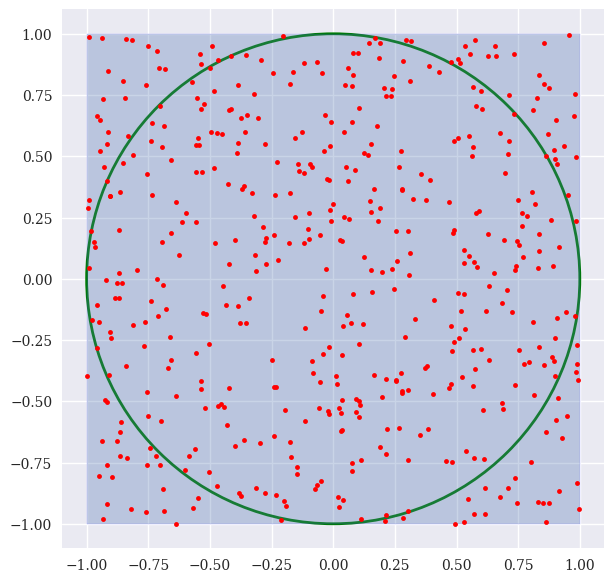

In [78]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)
circ = plt.Circle((0, 0), radius=1, edgecolor = 'g', lw = 2.0, facecolor = 'None') # draws the unit circle
box = plt.Rectangle((-1, -1), 2, 2, edgecolor = 'b', alpha = 0.3) # draws the square with side length of 2
ax.add_patch(circ)
ax.add_patch(box)
plt.plot(rn[:,0], rn[:,1], 'r.') # draws the uniformly distributed random dots
plt.ylim(-1.1, 1.1)
plt.xlim(-1.1, 1.1)

In [79]:
n = int(1e7)

In [80]:
%time rn = np.random.random((n, 2)) * 2 - 1

CPU times: user 142 ms, sys: 996 ms, total: 1.14 s
Wall time: 98.9 ms


In [81]:
rn.nbytes

160000000

In [82]:
%time distance = np.sqrt((rn ** 2).sum(axis=1)) # the distance of the points from the origin (Euclidean norm)
distance[:8].round(3)

CPU times: user 98.2 ms, sys: 611 ms, total: 710 ms
Wall time: 87.8 ms


array([0.864, 0.412, 0.535, 1.238, 0.654, 1.034, 0.599, 0.936])

In [83]:
%time frac = (distance <= 1.0).sum() / len(distance) # the fraction of those points onb the circle relative to all points

CPU times: user 4.21 ms, sys: 1.9 ms, total: 6.11 ms
Wall time: 5.21 ms


In [84]:
pi_mcs = frac * 4 # this accounts for the square area of 4 for the estimation of the circle area and therewith of pi
pi_mcs

3.1418064

In [85]:
def mcs_pi_py(n):
    circle = 0
    for _ in range(n):
        x, y = random.random(), random.random()
        if (x ** 2 + y ** 2) ** 0.5 <= 1:
            circle += 1
    return (4 * circle) / n

In [86]:
%time mcs_pi_py(n)

CPU times: user 1.95 s, sys: 2 ms, total: 1.95 s
Wall time: 1.96 s


3.1418464

In [87]:
mcs_pi_nb = numba.jit(mcs_pi_py)

In [88]:
%time mcs_pi_nb(n)

CPU times: user 141 ms, sys: 3.21 ms, total: 144 ms
Wall time: 147 ms


3.1414948

In [89]:
%%cython -a
import random
def mcs_pi_cy1(int n):
    cdef int i, circle = 0
    cdef float x, y
    for i in range(n):
        x, y = random.random(), random.random()
        if (x * x + y * y) <= 1:
            circle += 1
    return (4 * circle) / n

In [90]:
%time mcs_pi_cy1(n)

CPU times: user 429 ms, sys: 787 µs, total: 429 ms
Wall time: 429 ms


3.14183

In [91]:
%%cython -a
from libc.stdlib cimport rand
cdef extern from 'limits.h':
    int INT_MAX
def mcs_pi_cy2(int n):
    cdef int i, circle = 0
    cdef float x, y
    for i in range(n):
        x, y = rand() / INT_MAX, rand() / INT_MAX
        if (x * x + y * y) <= 1:
            circle += 1
    return (4 * circle) / n

In [92]:
%time mcs_pi_cy2(n)

CPU times: user 90.4 ms, sys: 160 µs, total: 90.6 ms
Wall time: 90.6 ms


3.1405956

**Binomial Trees**

In [93]:
import math

In [94]:
S0 = 36 # initial value of the risky asset
T = 1.0 # time horizon for the binomial tree simulation
r = 0.06    # constant short rate
sigma = 0.2 # constant volatility factor

In [95]:
def simulate_tree(M):
    dt = T / M  # length of the time intervals
    u = math.exp(sigma * math.sqrt(dt)) # factors for the upward and downward movements
    d = 1 / u
    S = np.zeros((M + 1, M + 1))
    S[0, 0] = S0
    z = 1
    for t in range(1, M + 1):
        for i in range(z):
            S[i, t] = S[i, t - 1] * u
            S[i + 1, t] = S[i, t - 1] * d
        z += 1
    return S 

In [96]:
np.set_printoptions(formatter={'float':lambda x: '%6.2f' % x})

In [97]:
simulate_tree(4) # tree with 4 time intervals

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [  0.00,  32.57,  36.00,  39.79,  43.97],
       [  0.00,   0.00,  29.47,  32.57,  36.00],
       [  0.00,   0.00,   0.00,  26.67,  29.47],
       [  0.00,   0.00,   0.00,   0.00,  24.13]])

In [98]:
%time simulate_tree(500) # tree with 500 intervals

CPU times: user 38.9 ms, sys: 642 µs, total: 39.5 ms
Wall time: 39 ms


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [  0.00,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [  0.00,   0.00,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.41]])

In [99]:
M = 4

In [100]:
up = np.arange(M + 1)
up = np.resize(up, (M + 1, M + 1))  # ndarray object with gross upward movements
up

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [101]:
down = up.T * 2 # ndarray object with gross downward movements
down

array([[0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [4, 4, 4, 4, 4],
       [6, 6, 6, 6, 6],
       [8, 8, 8, 8, 8]])

In [102]:
up - down   # ndarray object with net upward (positive) and downword (negative) movements

array([[ 0,  1,  2,  3,  4],
       [-2, -1,  0,  1,  2],
       [-4, -3, -2, -1,  0],
       [-6, -5, -4, -3, -2],
       [-8, -7, -6, -5, -4]])

In [103]:
dt = T / M

In [104]:
S0 * np.exp(sigma * math.sqrt(dt) * (up - down)) # tree for four time intervals(upper-right triangle of values)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [ 29.47,  32.57,  36.00,  39.79,  43.97],
       [ 24.13,  26.67,  29.47,  32.57,  36.00],
       [ 19.76,  21.84,  24.13,  26.67,  29.47],
       [ 16.18,  17.88,  19.76,  21.84,  24.13]])

In [105]:
def simulate_tree_np(M):
    dt = T / M
    up = np.arange(M + 1)
    up = np.resize(up, (M + 1, M + 1))
    down = up.transpose() * 2
    S = S0 * np.exp(sigma * math.sqrt(dt) * (up - down))
    return S

In [106]:
simulate_tree_np(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [ 29.47,  32.57,  36.00,  39.79,  43.97],
       [ 24.13,  26.67,  29.47,  32.57,  36.00],
       [ 19.76,  21.84,  24.13,  26.67,  29.47],
       [ 16.18,  17.88,  19.76,  21.84,  24.13]])

In [107]:
%time simulate_tree_np(500)

CPU times: user 1.53 ms, sys: 1.04 ms, total: 2.57 ms
Wall time: 2.21 ms


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [ 35.36,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [ 34.73,  35.05,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.41,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.40,   0.41,   0.41]])

In [108]:
simulate_tree_nb = numba.jit(simulate_tree)

In [109]:
simulate_tree_nb(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [  0.00,  32.57,  36.00,  39.79,  43.97],
       [  0.00,   0.00,  29.47,  32.57,  36.00],
       [  0.00,   0.00,   0.00,  26.67,  29.47],
       [  0.00,   0.00,   0.00,   0.00,  24.13]])

In [110]:
%time simulate_tree_nb(500)

CPU times: user 96 µs, sys: 149 µs, total: 245 µs
Wall time: 246 µs


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [  0.00,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [  0.00,   0.00,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.41]])

In [111]:
%timeit simulate_tree_nb(500)

107 µs ± 965 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [112]:
%%cython -a
import numpy as np
cimport cython
from libc.math cimport exp, sqrt
cdef float S0 = 36.
cdef float T = 1.0
cdef float r = 0.06
cdef sigma = 0.2
def simulate_tree_cy(int M):
    cdef int z, t, i
    cdef float dt, u, d
    cdef float[:, :] S = np.zeros((M + 1, M + 1), dtype = np.float32) # declaring the ndarray object to be a C array is critical for performance
    dt = T / M
    u = exp(sigma * sqrt(dt))
    d = 1 / u
    S[0, 0] = S0
    z = 1
    for t in range(1, M + 1):
        for i in range(z):
            S[i, t] = S[i, t - 1] * u
            S[i + 1, t] = S[i, t -1] * d
        z += 1
    return np.array(S)

In [113]:
simulate_tree_cy(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [  0.00,  32.57,  36.00,  39.79,  43.97],
       [  0.00,   0.00,  29.47,  32.57,  36.00],
       [  0.00,   0.00,   0.00,  26.67,  29.47],
       [  0.00,   0.00,   0.00,   0.00,  24.13]], dtype=float32)

In [114]:
%time simulate_tree_cy(500)

CPU times: user 229 µs, sys: 162 µs, total: 391 µs
Wall time: 246 µs


array([[ 36.00,  36.32,  36.65, ..., 3095.77, 3123.59, 3151.65],
       [  0.00,  35.68,  36.00, ..., 3040.89, 3068.21, 3095.77],
       [  0.00,   0.00,  35.36, ..., 2986.97, 3013.81, 3040.89],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.41]],
      dtype=float32)

In [115]:
%timeit S = simulate_tree_cy(500)

68 µs ± 1.19 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


**Monte Carlo Simulation**

In [116]:
M = 100 # the number of time intervals for discretization
I = 50000   # the number of paths to be simulated

In [117]:
def mcs_simulation_py(p):
    M, I = p
    dt = T / M
    S = np.zeros((M + 1, I))
    S[0] = S0
    rn = np.random.standard_normal(S.shape) # the random numbers, drawn in a single vectorized step
    for t in range(1, M + 1):
        for i in range(I):  # the nested loop implementing the simulation based on the Euler scheme
            S[t, i] = S[t - 1, i] * math.exp((r - sigma ** 2 / 2) * dt + sigma * math.sqrt(dt) * rn[t, i])
    return S

In [118]:
%time S = mcs_simulation_py((M, I))

CPU times: user 2.27 s, sys: 9.3 ms, total: 2.28 s
Wall time: 2.29 s


In [119]:
S[-1].mean()    # the mean end-of-period value based on the simulation

38.22762885019786

In [120]:
S0 * math.exp(r * T)    # the theoretically expected end-of-period value

38.22611567563295

In [121]:
K = 40  # the strike price of the European put option

In [122]:
C0 = math.exp(-r * T) * np.maximum(K - S[-1], 0).mean() # the Monte Carlo estimator for the option

In [123]:
C0  #

3.8476578595642894

In [124]:
def mcs_simulation_np(p):
    M, I = p
    dt = T / M
    S = np.zeros((M + 1, I))
    S[0] = S0
    rn = np.random.standard_normal(S.shape)
    for t in range(1, M + 1): # the loop over the time intervals
        S[t] = S[t - 1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * math.sqrt(dt) * rn[t]) 
        # the Euler scheme with vectorized NumPy code handling all paths at once
    return S

In [125]:
%time S = mcs_simulation_np((M, I))

CPU times: user 94.1 ms, sys: 7.75 ms, total: 102 ms
Wall time: 104 ms


In [126]:
S[-1].mean()

38.2510162579358

In [127]:
%timeit S = mcs_simulation_np((M, I))

86.5 ms ± 458 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [128]:
mcs_simulation_nb = numba.jit(mcs_simulation_py)

In [129]:
%time S = mcs_simulation_nb((M, I)) # first call with compile-time overhead

CPU times: user 309 ms, sys: 6.38 ms, total: 315 ms
Wall time: 321 ms


In [130]:
%time S = mcs_simulation_nb((M, I)) # second call without that overhead

CPU times: user 84.2 ms, sys: 3.62 ms, total: 87.8 ms
Wall time: 87.9 ms


In [131]:
S[-1].mean()

38.187542499439296

In [132]:
C0 = math.exp(-r * T) * np.maximum(K - S[-1], 0).mean()

In [133]:
C0

3.870208976710533

In [134]:
%timeit S = mcs_simulation_nb((M, I))

87.1 ms ± 372 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [135]:
'''
%%cython
import numpy as np
cimport numpy as np
cimport cython
from libc.math cimport exp, sqrt
cdef float S0 = 36.
cdef float T = 1.0
cdef float r = 0.06
cdef float sigma = 0.2
@cython.boundscheck(False)
@cython.wraparound(False)
def mcs_simulation_cy(p):
    cdef int M, I
    M, I = p
    cdef int t, i
    cdef float dt = T / M
    cdef double[:, :] S = np.zeros((M + 1, I))
    cdef double[:, :] rn = np.random.standard_normal((M + 1, I))
    S[0] = S0
    for t in range(I):
        S[t, i] = S[t - 1, i] * exp((r - sigma ** 2 / 2) * dt + sigma * sqrt(dt) * rn[t, i])
    return np.array(S)

'''

'\n%%cython\nimport numpy as np\ncimport numpy as np\ncimport cython\nfrom libc.math cimport exp, sqrt\ncdef float S0 = 36.\ncdef float T = 1.0\ncdef float r = 0.06\ncdef float sigma = 0.2\n@cython.boundscheck(False)\n@cython.wraparound(False)\ndef mcs_simulation_cy(p):\n    cdef int M, I\n    M, I = p\n    cdef int t, i\n    cdef float dt = T / M\n    cdef double[:, :] S = np.zeros((M + 1, I))\n    cdef double[:, :] rn = np.random.standard_normal((M + 1, I))\n    S[0] = S0\n    for t in range(I):\n        S[t, i] = S[t - 1, i] * exp((r - sigma ** 2 / 2) * dt + sigma * sqrt(dt) * rn[t, i])\n    return np.array(S)\n\n'

**Recursive pandas Algorithm**

In [140]:
import pandas as pd

In [141]:
sym = 'SPY'

In [142]:
data = pd.DataFrame(pd.read_csv('/Users/cherongtian/Desktop/PythonforFinance/tr_eikon_eod_data.csv',
                                index_col=0, parse_dates=True)[sym]).dropna()

In [143]:
alpha = 0.25

In [145]:
data['EWMA'] = data[sym]    # initializes the EWMA column

In [146]:
%%time
for t in zip(data.index, data.index[1:]):
    data.loc[t[1], 'EWMA'] = (alpha * data.loc[t[1], sym] + (1 - alpha) * data.loc[t[0], 'EWMA'])   # implements the algorithm based on a python loop

CPU times: user 183 ms, sys: 1.59 ms, total: 185 ms
Wall time: 186 ms


In [147]:
data.head()

,SPY,EWMA
Date,,
2010-01-04,113.33,113.330000
2010-01-05,113.63,113.405000
2010-01-06,113.71,113.481250
2010-01-07,114.19,113.658438
2010-01-08,114.57,113.886328


In [148]:
def ewma_py(x, alpha):
    y = np.zeros_like(x)
    y[0] = x[0]
    for i in range(1, len(x)):
        y[i] = alpha * x[i] + (1 - alpha) * y[i - 1]
    return y

In [149]:
%time data['EWMA_PY'] = ewma_py(data[sym], alpha)   # applies the function to the Series object directly

CPU times: user 19.3 ms, sys: 719 µs, total: 20 ms
Wall time: 19.9 ms


In [150]:
%time data['EWMA_PY'] = ewma_py(data[sym].values, alpha)    # applies the function to the ndarray object containing the raw data

CPU times: user 1.45 ms, sys: 113 µs, total: 1.56 ms
Wall time: 1.61 ms
